In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# THIS CELL IS THE ONLY CODE NEEDED FOR GEOCLAW.
# THE REST IS FOR PROOF OF CONCEPT

# read in data
data = pd.read_excel('Fixed92kmFaultOffset50kmgapPts.xls')
# create numpy array
data = np.array(data[['POINT_X', 'POINT_Y', 'Strike']])
# create kde
pdf = stats.gaussian_kde(data.T)
# samples from distribution: the order is latitude, longitude, strike
pdf.resample(3).T

array([[  1.27906363e+02,  -3.03235847e-01,   3.90721760e+02],
       [  1.26510416e+02,  -2.46723113e+00,   2.86178935e+02],
       [  1.28023248e+02,  -6.97885219e+00,   1.71898984e+02]])

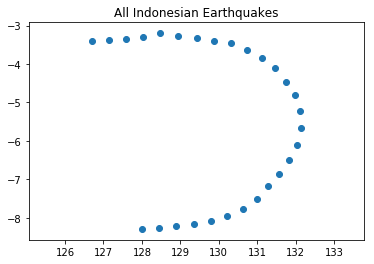

In [4]:
lat = data[:,1]
lon = data[:,0]
strike = data[:,2]
coords = data[:,:2]
plt.title('All Indonesian Earthquakes')
plt.scatter(lon,lat,alpha=1)
plt.axis('equal')
plt.show()


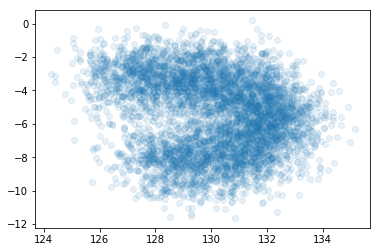

In [7]:
pdf = stats.gaussian_kde(np.vstack((lon,lat)))
draws = pdf.resample(5000).T
plt.scatter(draws[:,0], draws[:,1], alpha=0.1)
plt.show()

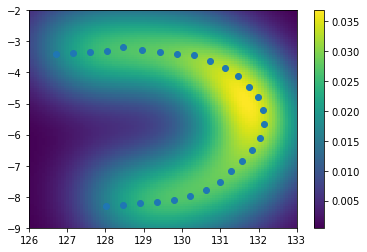

In [8]:
x = np.linspace(126,133,100)
y = np.linspace(-9,-2,100)
X,Y = np.meshgrid(x,y)
Z = np.zeros_like(X)
for i in range(len(x)):
    for j in range(len(y)):
        Z[j,i] = pdf.evaluate(np.array([x[i], y[j]]))

plt.pcolormesh(X, Y, Z, cmap="viridis")
plt.colorbar()
plt.scatter(lon,lat)
plt.show()

(2, 28)


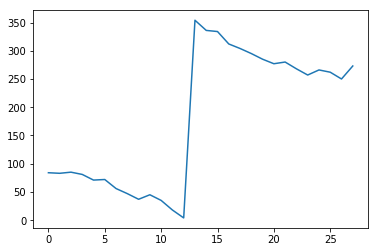

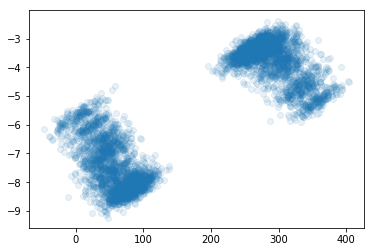

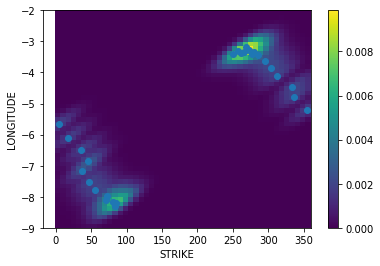

In [6]:

pdf_strike_lat = stats.gaussian_kde(np.vstack((strike,lat)), bw_method=0.15)
print(data[:,1:].T.shape)
plt.plot(strike)
plt.show()
draws = pdf_strike_lat.resample(5000).T
plt.scatter(draws[:,0], draws[:,1], alpha=0.1)
plt.show()
x = np.linspace(0,360,50)    # strike
y = np.linspace(-9,-2,50)    # latitude
X,Y = np.meshgrid(x,y)
Z = np.zeros_like(X)
for i in range(len(x)):
    for j in range(len(y)):
        Z[j,i] = pdf_strike_lat.evaluate(np.array([x[i], y[j]]))

plt.pcolormesh(X, Y, Z, cmap="viridis")
plt.colorbar()
plt.xlabel('STRIKE')
plt.ylabel('LONGITUDE')
plt.scatter(data[:,2],data[:,1])
plt.show()

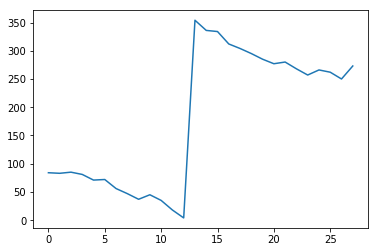

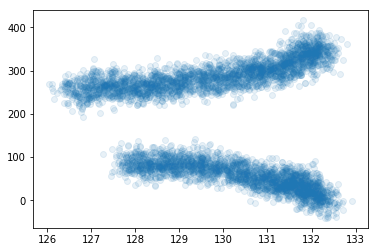

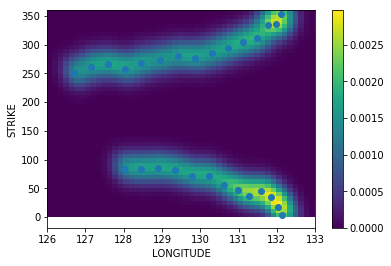

In [7]:

pdf_strike_lon = stats.gaussian_kde(np.vstack((lon, strike)), bw_method=0.15)
plt.plot(data[:,2])
plt.show()
draws = pdf_strike_lon.resample(5000).T
plt.scatter(draws[:,0], draws[:,1], alpha=0.1)
plt.show()

x = np.linspace(126,133,50)  # longitude
y = np.linspace(0,360,50)    # strike
X,Y = np.meshgrid(x,y)
Z = np.zeros_like(X)
for i in range(len(x)):
    for j in range(len(y)):
        Z[j,i] = pdf_strike_lon.evaluate(np.array([x[i], y[j]]))

plt.pcolormesh(X, Y, Z, cmap="viridis")
plt.colorbar()
plt.scatter(lon,strike)
plt.xlabel('LONGITUDE')
plt.ylabel('STRIKE')
plt.show()